# PROJECT 2:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## READING THE DATA:

In [ ]:
df = pd.read_csv("telco-customer-churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info() #Information on all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns #column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
corr = df.corr()
corr  #correlation on all numeric data

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [ ]:
df.nunique(axis=0) #returns the number of unique values for each attribute

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## EDA:

In [ ]:
df.isnull().values.any() # to find all the null, NAN or empty values over the entire DataFrame
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')
df[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.drop(columns='customerID', inplace=True)

In [ ]:

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()) #substitute null values with mean

df.isnull().values.any() # to find all the null, NAN or empty values over the entire DataFrame to re-check
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
corr = df.corr() # correlation on all the categorical as well as numeric data
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


<AxesSubplot:>

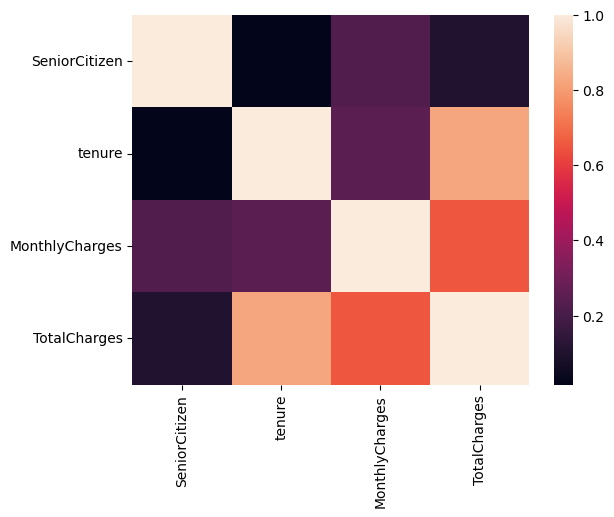

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## VISUALIZATION REPORTS:

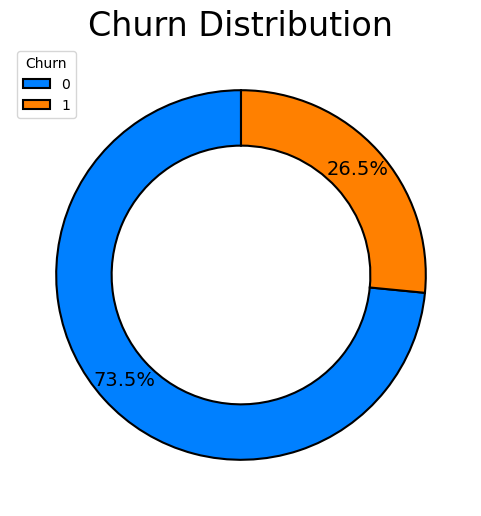

In [ ]:
def pie_plot(df, target, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    labels = df[target].unique()
    wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1.5}
    ax.pie(
        df[target].value_counts(normalize=True),
        wedgeprops=wedgeprops,
        startangle=90,
        colors=['#0080ff', '#ff8000'],
    #     labels=labels,
        autopct='%1.1f%%',
        textprops={'fontsize': 14},
        pctdistance=0.85
          )

    plt.title(title, fontsize=24, loc='center')
    plt.legend(title=target, labels=labels)
    plt.show()

pie_plot(df, "Churn", "Churn Distribution")

The following bar plot shows the percentage of observations that correspond to each class of the response variable: no and yes. As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class (above 73.5%).

In [ ]:
import math
def percentage_stacked_plot(columns_to_plot, super_title):

    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''

    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

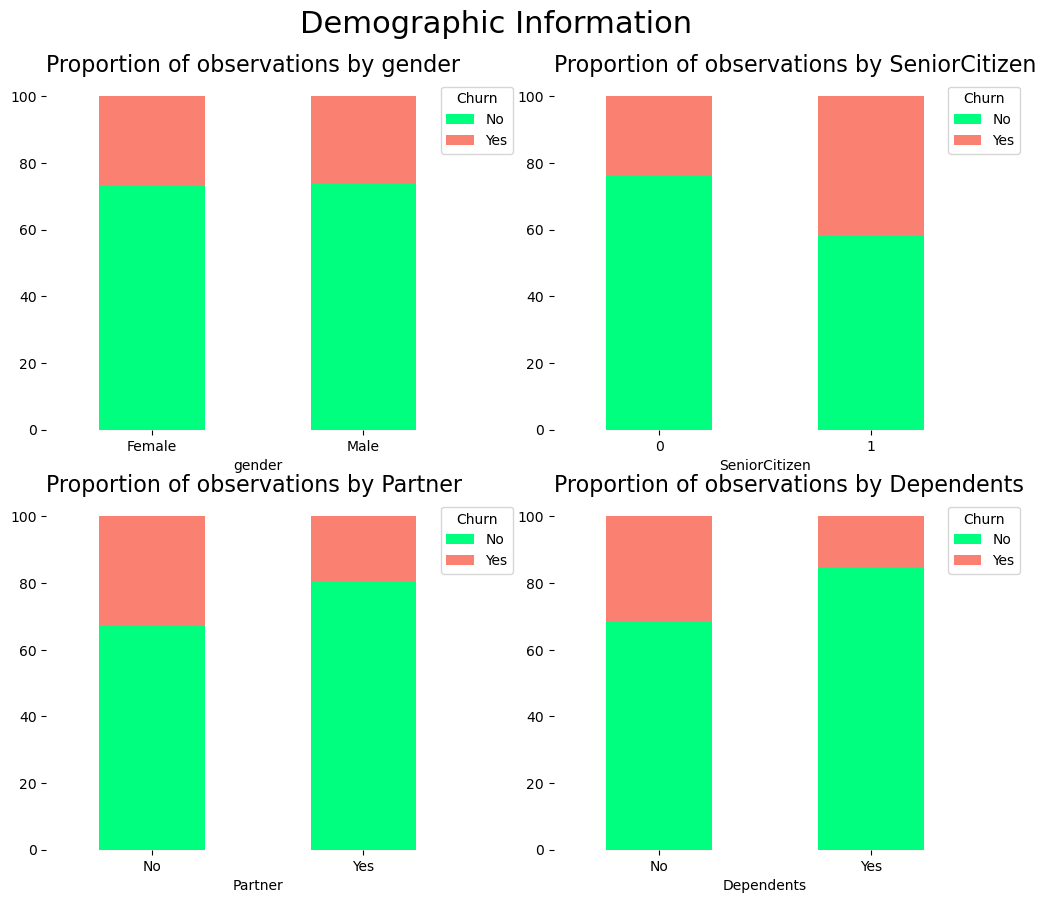

In [ ]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

We can extract the following conclusions by analyzing demographic attributes:

1. The churn rate of senior citizens is almost double that of young citizens.
2. We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
3. Customers with a partner churn less than customers with no partner.

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

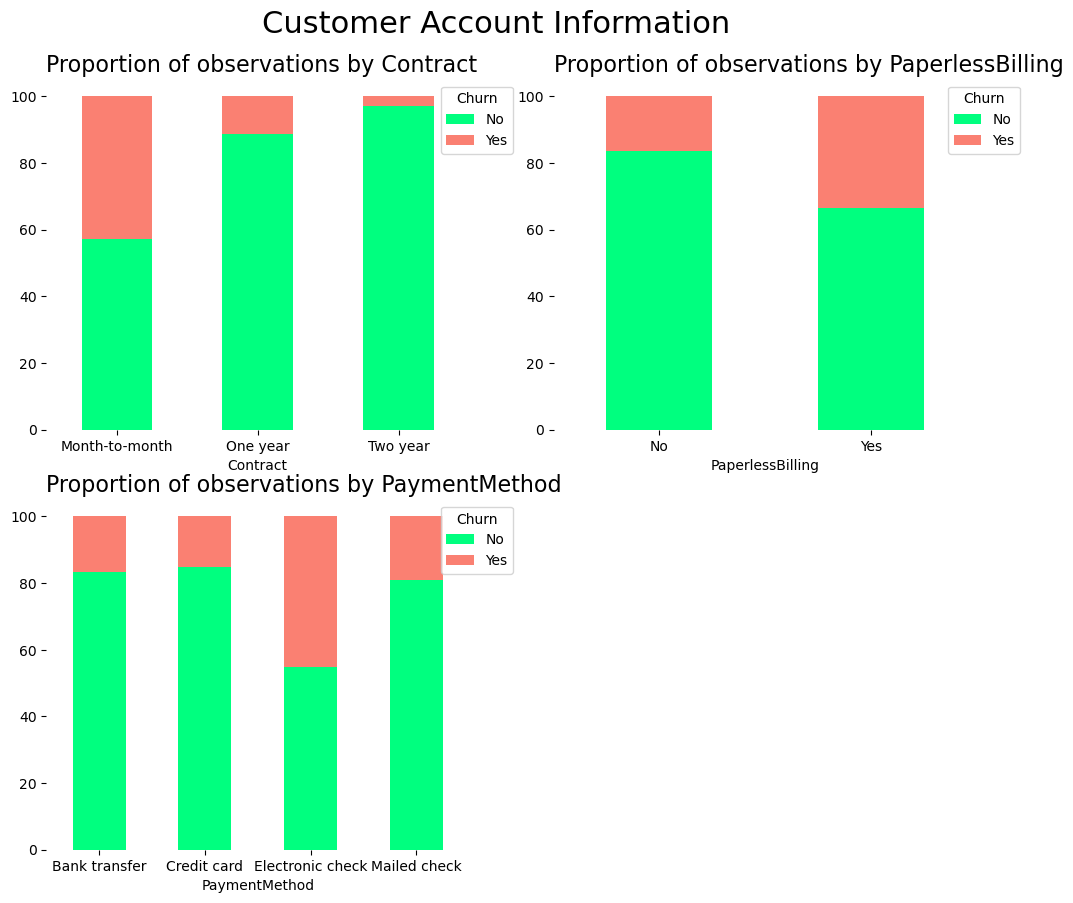

In [ ]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:

1. Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
2. Customers who opted for an electronic check as paying method are more likely to leave the company.
3. Customers subscribed to paperless billing churn more than those who are not subscribed.

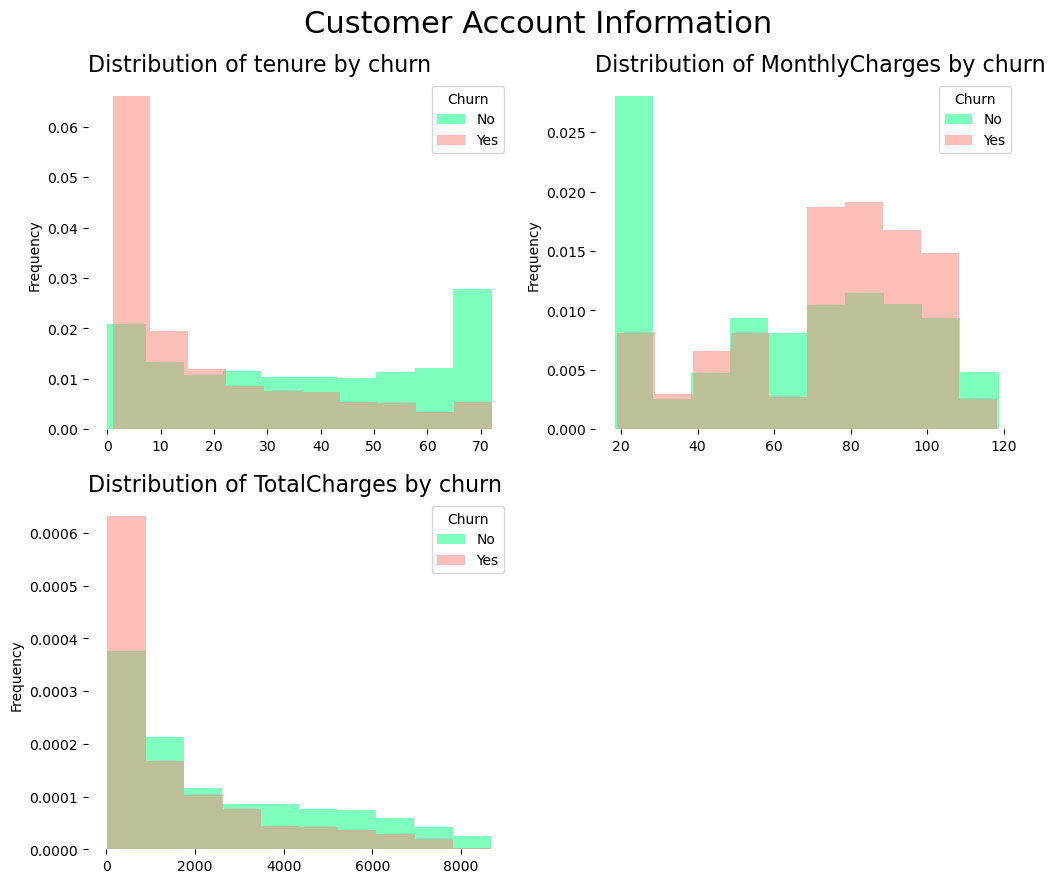

In [ ]:
def histogram_plots(columns_to_plot, super_title):
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True,
                                                       alpha=0.5, color='springgreen', label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns
histogram_plots(account_columns_numeric, 'Customer Account Information')

We can extract the following conclusions by analyzing the histograms above:

1. The churn rate tends to be larger when monthly charges are high.
2. New customers (low tenure) are more likely to churn.
3. Clients with high total charges are less likely to leave the company.

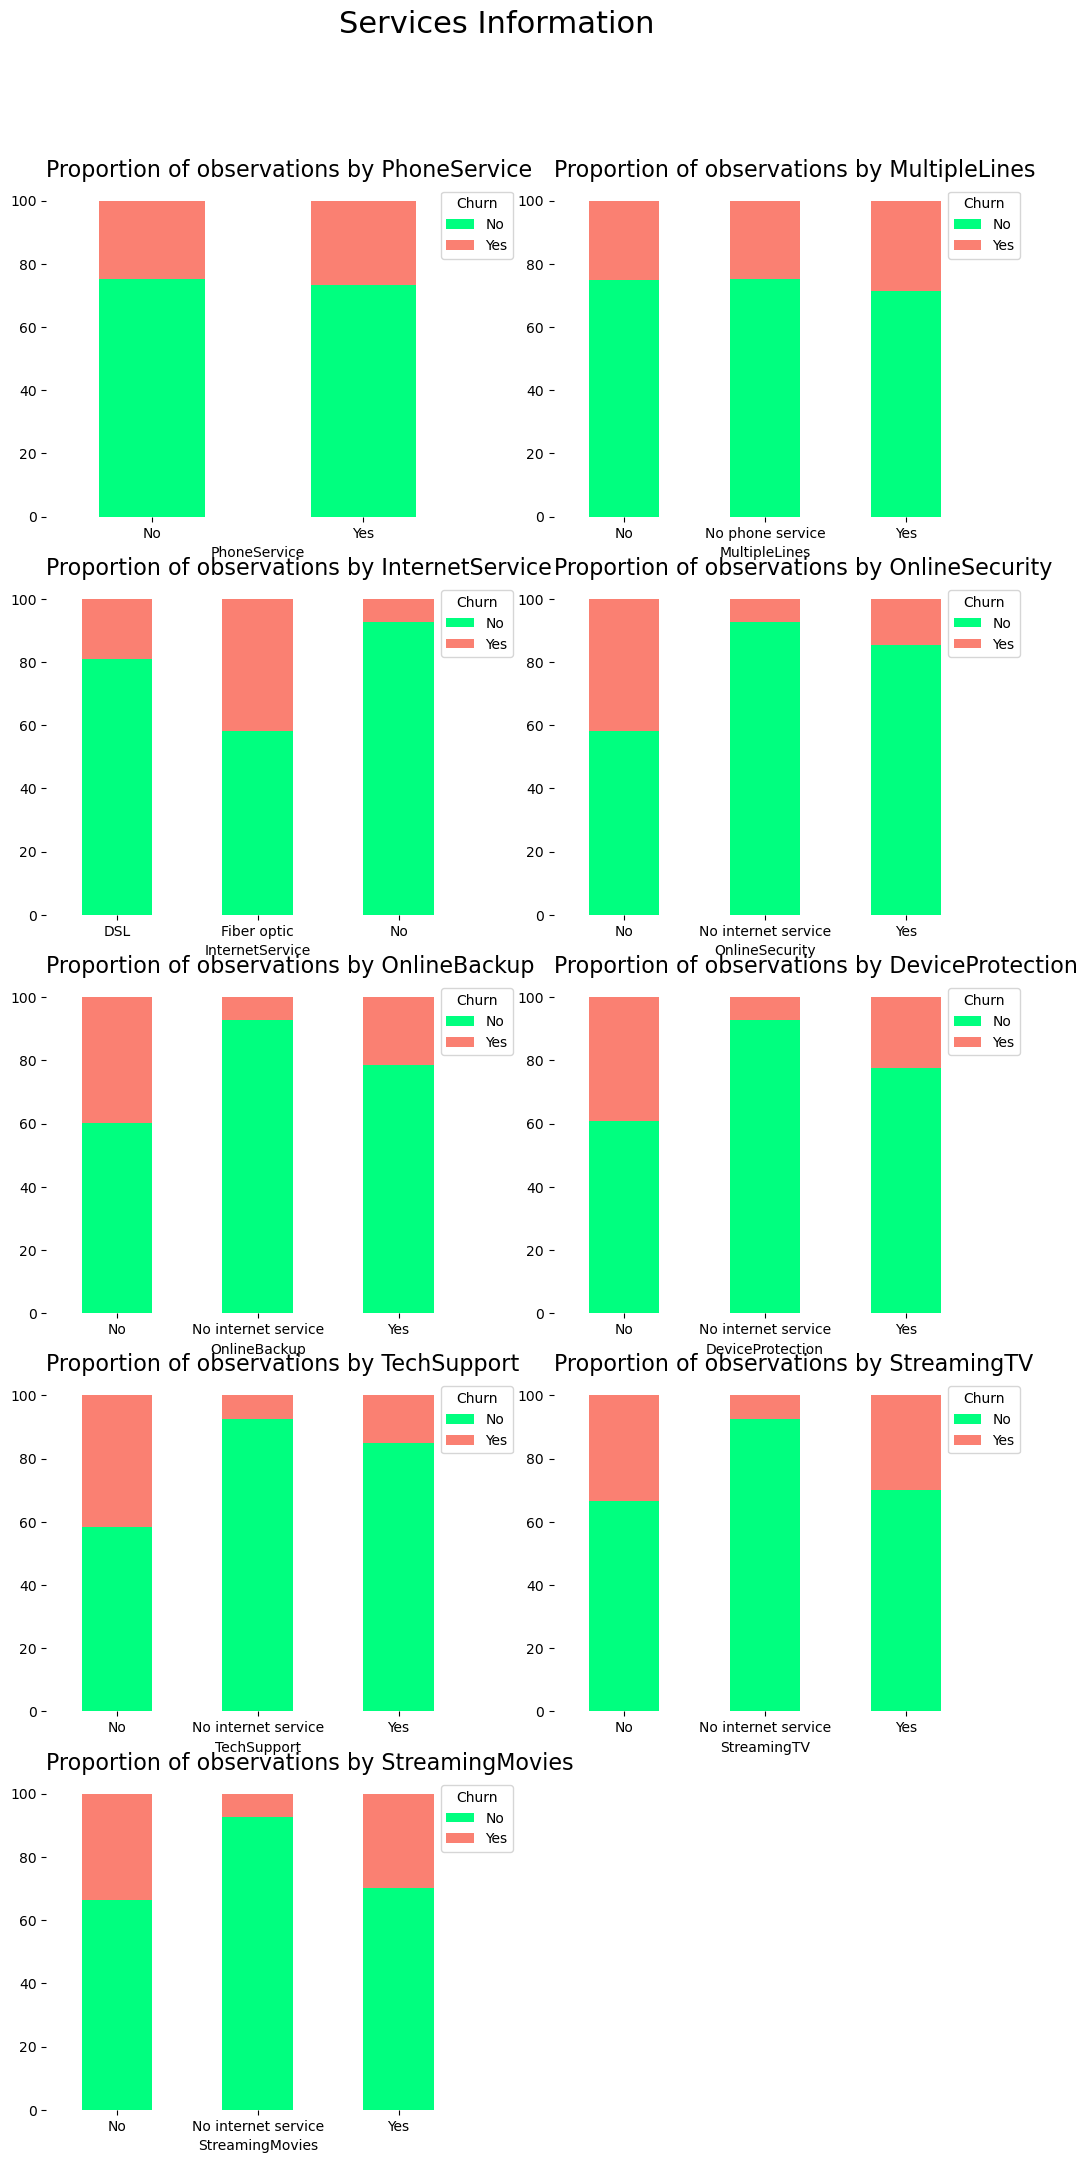

In [ ]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:

1. We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
2. Clients with online security churn less than those without it.
3. Customers with no tech support tend to churn more often than those with tech support.

## FEATURE ENGINEERING:

In [ ]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098453
OnlineSecurity      0.064677
TechSupport         0.063021
InternetService     0.055574
OnlineBackup        0.046792
PaymentMethod       0.044519
DeviceProtection    0.043917
StreamingMovies     0.032001
StreamingTV         0.031908
PaperlessBilling    0.019194
Dependents          0.014467
Partner             0.011454
MultipleLines       0.000801
PhoneService        0.000072
gender              0.000037
dtype: float64


In [ ]:
df = df.drop(['gender', 'PhoneService','MultipleLines'], axis=1)

What does Mutual Info Score do:

In the context of feature selection, mutual information score is used to evaluate the relevance of each feature to the target variable in a dataset. It measures the amount of information that the presence or absence of a feature can provide about the target variable.

**The mutual information score is calculated using probability distributions of the variables**

## ENCODING THE CATEGORICAL DATA:

In [ ]:
encoder=LabelEncoder()
df.Partner.unique()
df['Partner']=encoder.fit_transform(df['Partner'])
df['Dependents']=encoder.fit_transform(df['Dependents'])
df['InternetService']=encoder.fit_transform(df['InternetService'])
df['OnlineSecurity']=encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=encoder.fit_transform(df['DeviceProtection'])
df['TechSupport']=encoder.fit_transform(df['TechSupport'])
df['StreamingTV']=encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies']=encoder.fit_transform(df['StreamingMovies'])
df['Contract']=encoder.fit_transform(df['Contract'])
df['PaperlessBilling']=encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=encoder.fit_transform(df['PaymentMethod'])
df['Churn']=encoder.fit_transform(df['Churn'])

In [ ]:
features = df.iloc[:,2:-1]
Y = df.iloc[:,-1:] # splitting last column Churn
features  # splitting all but the last column as features

,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,0,34,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,0,2,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,0,45,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,2,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,1,72,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,1,11,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,0,4,1,0,0,0,0,0,0,0,1,3,74.40,306.60


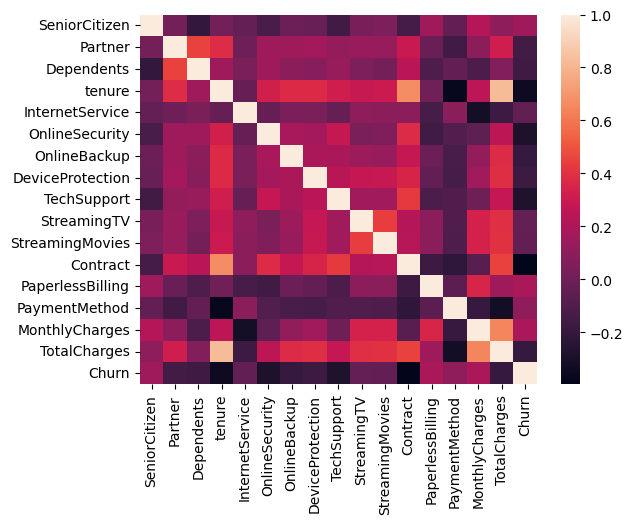

In [ ]:
f=sns.heatmap(df.corr())

## SPLITTING THE DATA:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.20)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 14)
(5634,)
(1409, 14)
(1409,)


## NORMALIZATION: (standard-scaler)



In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test_scaled=scaler.fit_transform(X_test)
X_train_scaled=scaler.transform(X_train)


## MODELS:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,roc_curve, roc_auc_score

def create_models(seed=4):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Naive Bayes', GaussianNB()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed, max_iter=1000)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('XGBClassifier', XGBClassifier(random_state=seed)))

    return models

# create a list with all the algorithms we are going to assess
models = create_models()

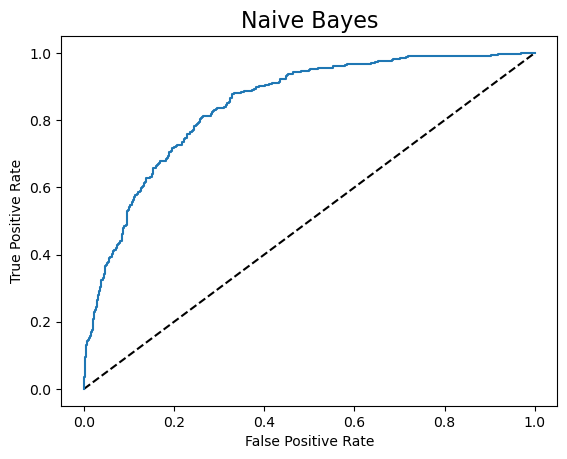


Classifier: Naive Bayes,  Recall: 0.7270341207349081)



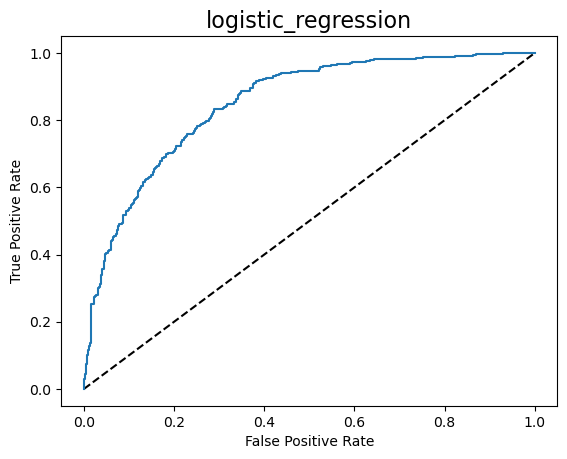


Classifier: logistic_regression,  Recall: 0.5196850393700787)



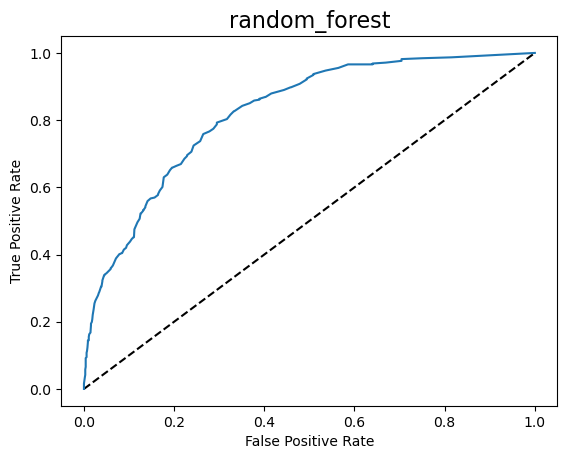


Classifier: random_forest,  Recall: 0.45144356955380577)



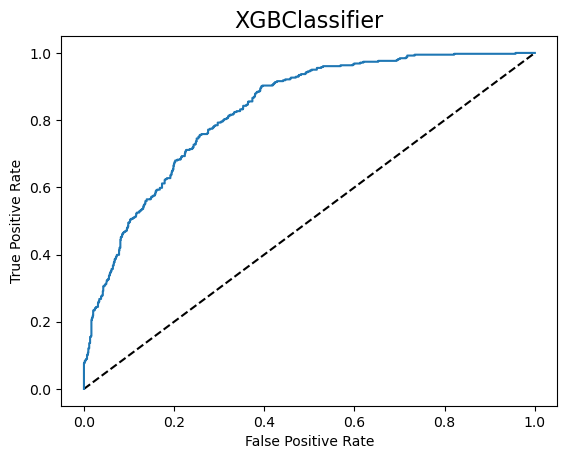


Classifier: XGBClassifier,  Recall: 0.5065616797900262)



In [ ]:
results = []
names = []
accuracys = []
precisions = []
f1 = []
scoring = 'Recall'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    # ROC Curve
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name,fontsize=16)
    plt.show()
    # append the model name and the accuracy to the lists
    results.append(recall)
    names.append(name)
    accuracys.append(accuracy)
    precisions.append(precision)
    # print classifier accuracy
    print("\nClassifier: {}, \033[1m Recall: {}\033[0m)\n".format(name, recall))

In [ ]:
result_dict = {'MODEL': names, 'RECALL': results, 'ACCURACY':accuracys,'PRECISIONS': precisions}
df2 = pd.DataFrame(result_dict)
df2

,MODEL,RECALL,ACCURACY,PRECISIONS
0,Naive Bayes,0.727034,0.767921,0.554000
1,logistic_regression,0.519685,0.802697,0.675768
2,random_forest,0.451444,0.770759,0.601399
3,XGBClassifier,0.506562,0.787793,0.634868


## SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

def smote_create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    smote_models = []
    smote_models.append(('Naive Bayes', GaussianNB()))
    smote_models.append(('logistic_regression', LogisticRegression(random_state=seed, max_iter=1000)))
    smote_models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    smote_models.append(('XGBClassifier', XGBClassifier(random_state=seed)))

    return smote_models

# create a list with all the algorithms we are going to assess
smote_models = smote_create_models()

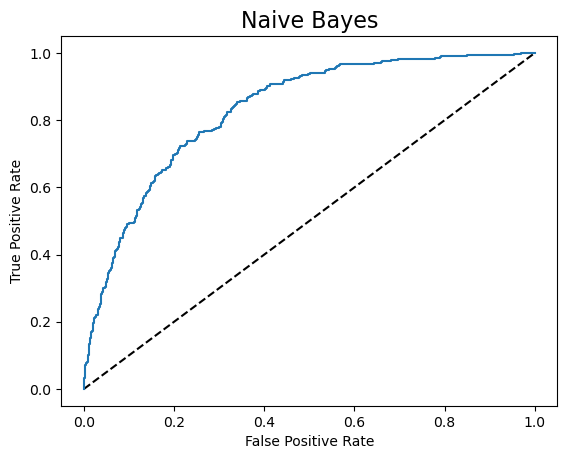

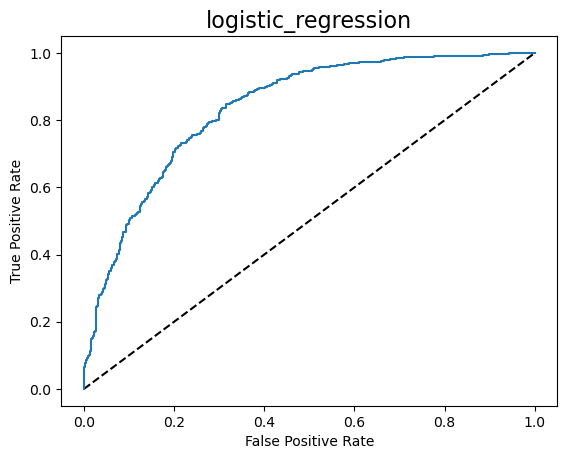

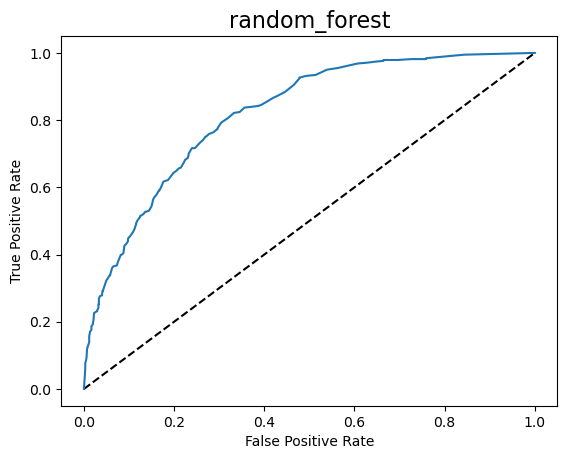

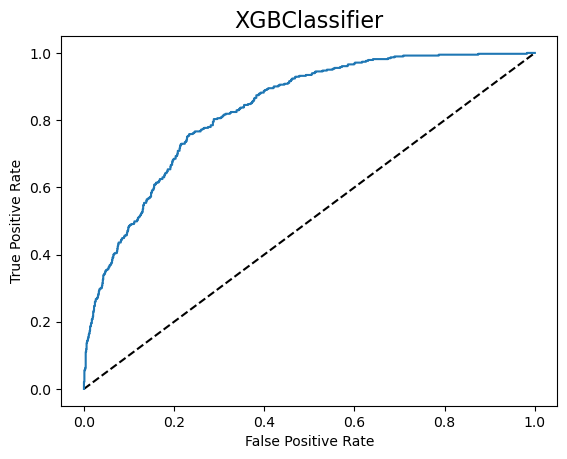

In [ ]:
scoring = 'Recall'
results_smote = []
names_smote = []
accuracys_smote = []
precisions_smote = []
f1_smote = []
for name, model in smote_models:
    # fit the model with the training data
    model.fit(X_train_Smote, y_train_Smote).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    # ROC Curve
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name,fontsize=16)
    plt.show()
    # append the model name and the accuracy to the lists
    results_smote.append(recall)
    names_smote.append(name)
    accuracys_smote.append(accuracy)
    precisions_smote.append(precision)

In [ ]:
result_dict = {'MODEL': names_smote, 'RECALL': results_smote, 'ACCURACY':accuracys_smote,'PRECISIONS': precisions_smote}
df3 = pd.DataFrame(result_dict)
df3

,MODEL,RECALL,ACCURACY,PRECISIONS
0,Naive Bayes,0.721785,0.768630,0.555556
1,logistic_regression,0.742782,0.760823,0.542146
2,random_forest,0.543307,0.767211,0.573407
3,XGBClassifier,0.595801,0.777857,0.588083


## HYPERPARAMETER TUNING:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


## For Standard Models :

In [ ]:
def hyper_create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    hyper_models = []
    hyper_models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    hyper_models.append(('XGBClassifier', XGBClassifier(random_state=seed)))

    return hyper_models

# create a list with all the algorithms we are going to assess
hyper_models = hyper_create_models()

In [ ]:
results_hyper = []
names_hyper = []
accuracys_hyper = []
precisions_hyper = []
def estimator(rf_random):
  for name, model in hyper_models:
      # fit the model with the training data
      model.fit(X_train, y_train).predict(X_test)
      # make predictions with the testing data
      predictions = model.predict(X_test)
      # calculate accuracy
      recall = recall_score(y_test, predictions)
      accuracy = accuracy_score(y_test, predictions)
      precision = precision_score(y_test, predictions)
      # ROC Curve
      y_pred_prob = model.predict_proba(X_test)[:,1]
      fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
      auc = roc_auc_score(y_test, y_pred_prob)
      plt.plot([0, 1], [0, 1], 'k--' )
      plt.plot(fpr,tpr,label="AUC="+str(auc))
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(name,fontsize=16)
      plt.show()
      # append the model name and the accuracy to the lists
      results_hyper.append(recall)
      names_hyper.append(name)
      accuracys_hyper.append(accuracy)
      precisions_hyper.append(precision)

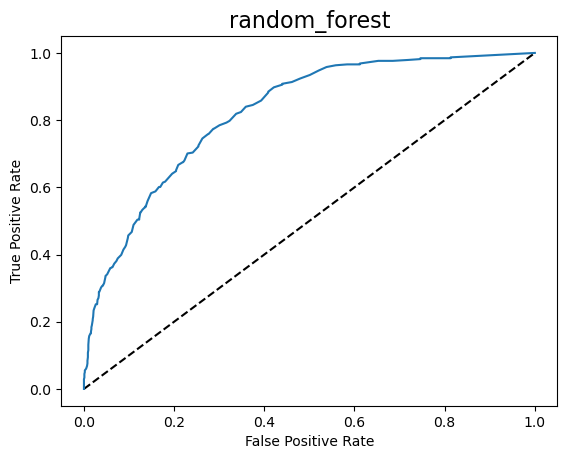

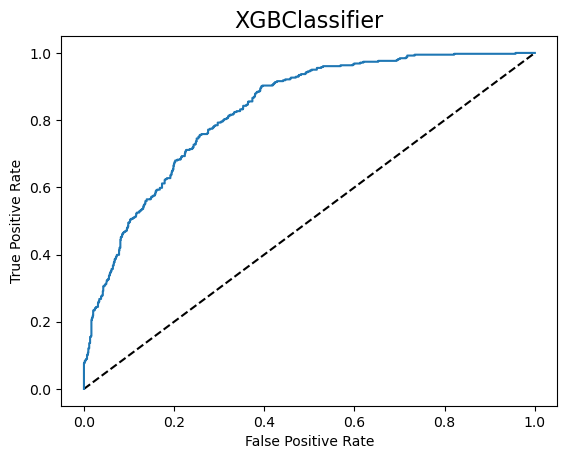

,MODEL,RECALL,ACCURACY,PRECISIONS
0,random_forest,0.467192,0.778566,0.620209
1,XGBClassifier,0.506562,0.787793,0.634868


In [ ]:
rf_random = RandomizedSearchCV(estimator = hyper_models, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
estimator(rf_random)

result_dict = {'MODEL': names_hyper, 'RECALL': results_hyper, 'ACCURACY':accuracys_hyper,'PRECISIONS': precisions_hyper}
df4 = pd.DataFrame(result_dict)
df4

## For SMOTE Models:

In [ ]:
results_smote_hyper = []
names_smote_hyper = []
accuracys_smote_hyper = []
precisions_smote_hyper = []

hyper_models_smote = hyper_create_models()

def estimator_smote(rf_random):
  for name, model in hyper_models:
      # fit the model with the training data
      model.fit(X_train_Smote, y_train_Smote).predict(X_test)
      # make predictions with the testing data
      predictions = model.predict(X_test)
      # calculate accuracy
      recall = recall_score(y_test, predictions)
      accuracy = accuracy_score(y_test, predictions)
      precision = precision_score(y_test, predictions)
      # ROC Curve
      y_pred_prob = model.predict_proba(X_test)[:,1]
      fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
      auc = roc_auc_score(y_test, y_pred_prob)
      plt.plot([0, 1], [0, 1], 'k--' )
      plt.plot(fpr,tpr,label="AUC="+str(auc))
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(name,fontsize=16)
      plt.show()
      # append the model name and the accuracy to the lists
      results_smote_hyper.append(recall)
      names_smote_hyper.append(name)
      accuracys_smote_hyper.append(accuracy)
      precisions_smote_hyper.append(precision)

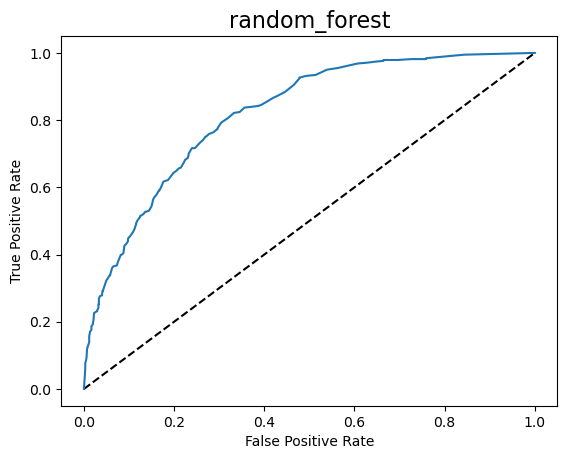

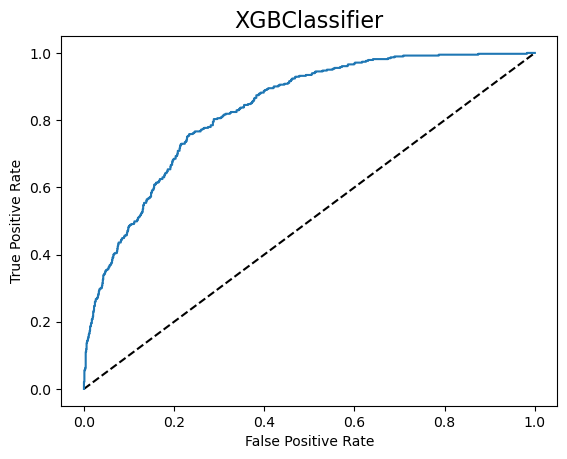

,MODEL,RECALL,ACCURACY,PRECISIONS
0,random_forest,0.543307,0.767211,0.573407
1,XGBClassifier,0.595801,0.777857,0.588083


In [ ]:
rf_random = RandomizedSearchCV(estimator = hyper_models_smote, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
estimator_smote(rf_random)

result_dict = {'MODEL': names_smote_hyper, 'RECALL': results_smote_hyper, 'ACCURACY':accuracys_smote_hyper,'PRECISIONS': precisions_smote_hyper}
df5 = pd.DataFrame(result_dict)
df5

## Conclusion :
- Before smote we have naive bases as the best model and after smote we have logistic as the best model

- For hyperparameter tuning for standard model we got XGBOOST as the best model and similarly for hyperparameter tuning of smote models we got XGBOOST is the best model